In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
superstore_data=pd.read_csv("C:\\Users\\Asus\\Downloads\\Sample - Superstore.csv\\Sample - Superstore.csv",encoding='ISO-8859-1')

In [3]:
superstore_data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Missing values

In [32]:
superstore_data.isnull().sum()

RowID           0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
Sub-Category    0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

> Here sum of null values of all columns is 0. So there is no missing values

### Remove Duplicates

In [4]:
superstore_data.drop_duplicates(inplace=True)

In [34]:
superstore_data.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Changing the type of order date to datetime

> we can see that all format of order date is not same. So first want to set it as same

In [5]:
from dateutil import parser


In [6]:
def parse_mixed_date(date_str):
    try:
        return parser.parse(date_str, dayfirst=False)  # assumes MM/DD/YYYY by default
    except:
        try:
            return parser.parse(date_str, dayfirst=True)  # fallback for DD-MM-YYYY
        except:
            return pd.NaT  # if it still fails


In [7]:
superstore_data['OrderDate'] = superstore_data['OrderDate'].apply(parse_mixed_date)

In [44]:
superstore_data['ShipDate'] = superstore_data['ShipDate'].apply(parse_mixed_date)

In [45]:
print(superstore_data.dtypes)

RowID                         int64
OrderID                      object
OrderDate            datetime64[ns]
ShipDate             datetime64[ns]
ShipMode                     object
CustomerID                   object
CustomerName                 object
Segment                      object
Country                      object
City                         object
State                        object
PostalCode                    int64
Region                       object
ProductID                    object
Category                     object
Sub-Category                 object
ProductName                  object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Month                        object
Year                          int32
Profit Margin (%)           float64
Month_Num                     int32
dtype: object


### Extracting Month and Year from OrderDate

In [9]:
superstore_data['Month'] = superstore_data['OrderDate'].dt.month_name()   # Example: January, February...
superstore_data['Year'] = superstore_data['OrderDate'].dt.year


In [10]:
superstore_data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015


In [17]:
superstore_data['Year'].unique()

array([2016, 2015, 2014, 2017])

> Here we have the data of 4 different year 2014 to 2017

In [21]:
superstore_data['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

# Sales and Profit Analysis

### 1. What is the total sales and profit?

In [44]:
total_sales = superstore_data['Sales'].sum()
total_profit = superstore_data['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02


###  2. Which category or sub-category generates the most profit?

In [46]:
# Category
category_profit = superstore_data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("Profit by Category:\n", category_profit)
print("_________________________________________________________________________________________________________________")
# Sub-Category
subcategory_profit = superstore_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("\nTop Sub-Categories by Profit:\n", subcategory_profit.head())


Profit by Category:
 Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64
_________________________________________________________________________________________________________________

Top Sub-Categories by Profit:
 Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


### 3.Which products have the highest sales but low profit?

In [55]:
high_sales_low_profit = superstore_data[superstore_data['Profit'] < 100].groupby('ProductName')[['Sales', 'Profit']].sum()
high_sales_low_profit = high_sales_low_profit.sort_values(by='Sales', ascending=False).head(10)

print("Top 10 Products with High Sales and Low Profit:\n", high_sales_low_profit)


Top 10 Products with High Sales and Low Profit:
                                                         Sales     Profit
ProductName                                                             
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1811.0784
Martin Yale Chadless Opener Electric Letter Opener  16656.200 -1299.1836
HON 5400 Series Task Chairs for Big and Tall        14580.384 -1121.5680
Lexmark MX611dhe Monochrome Laser Printer           13769.919 -5269.9690
Tennsco Single-Tier Lockers                          9158.296  -825.7480
Chromcraft Bull-Nose Wood Oval Conference Table...   8264.700 -3107.5272
Cubify CubeX 3D Printer Triple Head Print            7999.980 -3839.9904
DMI Eclipse Executive Suite Bookcases                7639.945   -70.1372
SAFCO Arco Folding Chair                             6849.760   378.3940
Tennsco Snap-Together Open Shelving Units, Star...   6819.312   181.6620


### 4. Are there products or regions with negative profit?

In [68]:
# Products with negative profit
negative_profit_products = superstore_data[superstore_data['Profit'] < 0].groupby('ProductName')['Profit'].sum().sort_values().head(10)
print("Products with Negative Profit:\n", negative_profit_products)

print("__________________________________________________________________________________________________________________")

# Regions with negative total profit
negative_profit_regions = superstore_data.groupby('Region')['Profit'].sum()
negative_regions = negative_profit_regions[negative_profit_regions < 0]
print("\nRegions with Negative Profit:\n", negative_regions)


Products with Negative Profit:
 ProductName
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
GBC DocuBind P400 Electric Binding System                                     -6859.3896
Lexmark MX611dhe Monochrome Laser Printer                                     -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System                              -5098.5660
GBC DocuBind TL300 Electric Binding System                                    -4162.0336
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                      -3107.5272
Ibico EPK-21 Electric Binding System                                          -2929.4845
Bush Advantage Collection Racetrack Conference Table                          -2545.2600
Name: Profit, dtype: float64
_____________________________________

### 5. What’s the profit margin per category or region?

Profit Margin = (Profit / Sales) × 100

In [66]:
# Category-level profit margin
category_margin = superstore_data.groupby('Category')[['Sales', 'Profit']].sum()
category_margin['ProfitMargin (%)'] = (category_margin['Profit'] / category_margin['Sales']) * 100
print("Profit Margin by Category:\n", category_margin)

print("________________________________________________________________________________________________________________________")

# Region-level profit margin
region_margin = superstore_data.groupby('Region')[['Sales', 'Profit']].sum()
region_margin['ProfitMargin (%)'] = (region_margin['Profit'] / region_margin['Sales']) * 100
print("\nProfit Margin by Region:\n", region_margin)


Profit Margin by Category:
                        Sales       Profit  ProfitMargin (%)
Category                                                   
Furniture        741999.7953   18451.2728          2.486695
Office Supplies  719047.0320  122490.8008         17.035158
Technology       836154.0330  145454.9481         17.395712
________________________________________________________________________________________________________________________

Profit Margin by Region:
                Sales       Profit  ProfitMargin (%)
Region                                             
Central  501239.8908   39706.3625          7.921629
East     678781.2400   91522.7800         13.483399
South    391721.9050   46749.4303         11.934342
West     725457.8245  108418.4489         14.944831


In [99]:
from matplotlib import cm

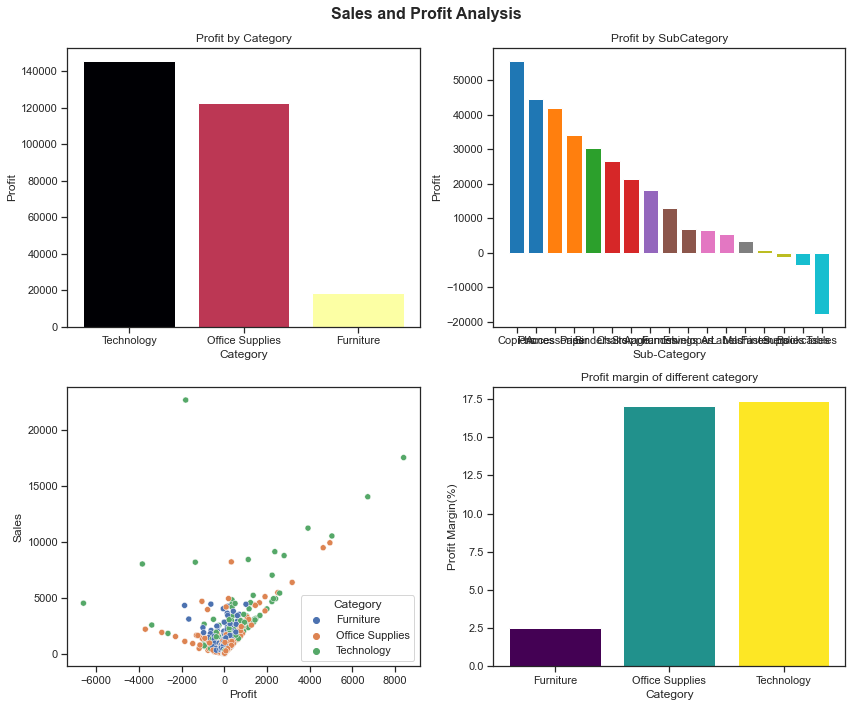

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Sales and Profit Analysis', fontsize=16, fontweight='bold')


# Plot data on each subplot
axes[0, 0].bar(category_profit.index, category_profit.values, color=cm.inferno(np.linspace(0, 1, len(category_margin))))

axes[0, 0].set_title('Profit by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Profit')

subcategory_profit
axes[0, 1].bar(subcategory_profit.index, subcategory_profit.values, color=cm.tab10(np.linspace(0, 1, len(subcategory_profit))))
axes[0, 1].set_title('Profit by SubCategory')
axes[0, 1].set_xlabel('Sub-Category')
axes[0, 1].set_ylabel('Profit')

sns.scatterplot(
    x='Profit',
    y='Sales',
    hue='Category',
    data=superstore_data,
   
    
    ax=axes[1, 0]
)
axes[1, 1].set_title('Profit over sales in different category')


axes[1, 1].bar(category_margin.index, category_margin['ProfitMargin (%)'].values, color=cm.viridis(np.linspace(0, 1, len(category_margin))))
axes[1, 1].set_title('Profit margin of different category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Profit Margin(%)')
# Adjust layout to prevent overlap
plt.tight_layout()

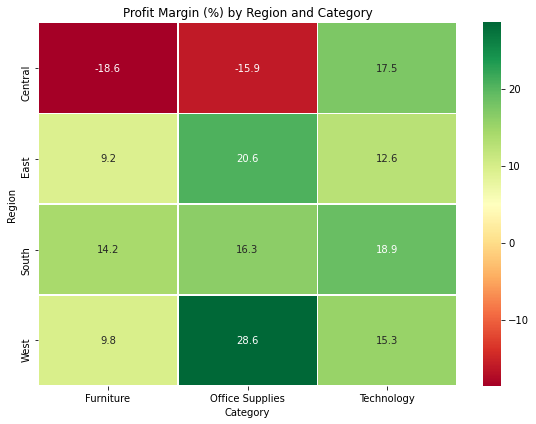

In [11]:
superstore_data['Profit Margin (%)'] = (superstore_data['Profit'] / superstore_data['Sales']) * 100
pivot = superstore_data.pivot_table(values='Profit Margin (%)', index='Region', columns='Category', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='RdYlGn', linewidths=0.5)
plt.title("Profit Margin (%) by Region and Category")
plt.tight_layout()
plt.show()

## Sales & Profit Analysis – Key Insights

##### Total Profit by Category

- **Technology** is the top-performing category, generating the highest profit of **\\$145,455**, followed by **Office Supplies** at **\\$122,491**.
- **Furniture**, although contributing significantly to sales, lags far behind in profit, with only **\\$18,451**, indicating low profitability.

#### Top Sub-Categories by Profit

- **Copiers, Phones**, and **Accessories** are the most profitable sub-categories, contributing heavily to overall profit.
- These sub-categories should be prioritized in marketing and inventory decisions.

#### Products with Negative Profit

Multiple products show substantial negative profit, especially:

1. Cubify CubeX 3D Printer Double Head: -**\\$9,240**

2.  **GBC Binding Systems and Lexmark Printers** also appear multiple times with heavy losses.

These indicate over-discounting, low demand, or high costs, and should be reviewed or discontinued.

#### High Sales but Low/Negative Profit Products

Some products such as the Cisco TelePresence System and Lexmark Printers generate very high sales but low or negative profit, pointing to margin leaks despite strong demand.

#### Profit Margins by Category

**Technology and Office Supplies** enjoy strong profit margins of over **17%**, suggesting efficient pricing and cost control.

**Furniture** has a concerningly low margin of only **2.5%**, requiring pricing or sourcing optimization.

#### Profit Margins by Region

The **West region** leads with the highest profit margin at **14.94%**, followed by **East (13.48%) and South (11.93%)**.

The **Central region has the lowest margin (7.92%)**, indicating inefficiency or over-discounting in that market.



### Suggested Actions

1. Optimize pricing or reduce costs for low-margin categories like Furniture.

2. Investigate negative-profit products for pricing errors or cost issues.

3. Focus sales efforts on profitable regions and high-margin categories.

4. Discontinue the selling  or change price for unprofitable products.

## Customer Analysis

### Top 10 Customers by Sales / Profit

In [12]:
top_customers = superstore_data.groupby('CustomerName')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)
print(top_customers)

                          Sales     Profit
CustomerName                              
Tamara Chand          19052.218  8981.3239
Raymond Buch          15117.339  6976.0959
Sanjit Chand          14142.334  5757.4119
Hunter Lopez          12873.298  5622.4292
Adrian Barton         14473.571  5444.8055
Tom Ashbrook          14595.620  4703.7883
Christopher Martinez   8954.020  3899.8904
Keith Dawkins          8181.256  3038.6254
Andy Reiter            6608.448  2884.6208
Daniel Raglin          8350.868  2869.0760


### Average Order Value per Customer

In [13]:
avg_order_value = superstore_data.groupby('CustomerName').apply(lambda x: x['Sales'].sum() / x['OrderID'].nunique())
avg_order_value = avg_order_value.reset_index(name='AvgOrderValue')
print(avg_order_value.head())


      CustomerName  AvgOrderValue
0    Aaron Bergman     295.385333
1    Aaron Hawkins     249.242857
2   Aaron Smayling     435.813143
3  Adam Bellavance     969.452500
4        Adam Hart     325.033700


### Most Profitable Customer Segment

In [19]:
segment_profit = superstore_data.groupby('Segment')[['Sales', 'Profit']].sum()
segment_profit['Profit Margin (%)'] = (segment_profit['Profit'] / segment_profit['Sales']) * 100
segment_profit = segment_profit.reset_index()
print(segment_profit)


       Segment         Sales       Profit  Profit Margin (%)
0     Consumer  1.161401e+06  134119.2092          11.548050
1    Corporate  7.061464e+05   91979.1340          13.025506
2  Home Office  4.296531e+05   60298.6785          14.034269


**Corporate segment** is the **most profitable**, with the **highest profit margin and profit value**, making it a **high-value target segment** for business-focused campaigns.

The top 10 customers account for a significant portion of the profit and can be prioritized for retention and personalized services.The average order value per customer reveals how much they typically spend, useful for promotions.


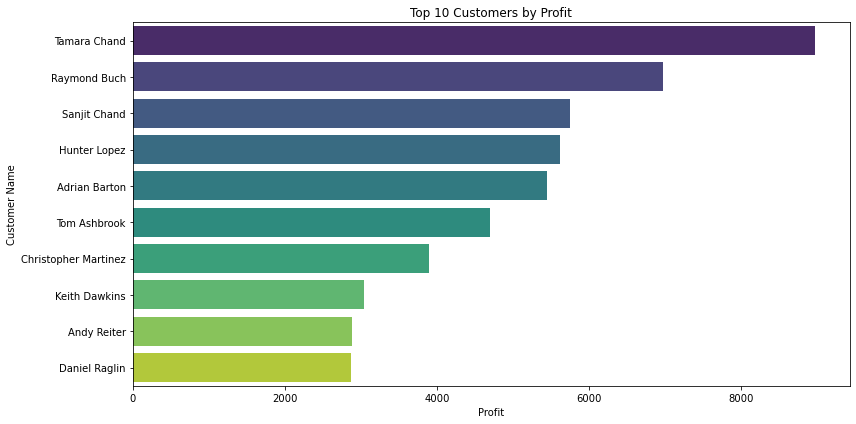

In [14]:

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers['Profit'], y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

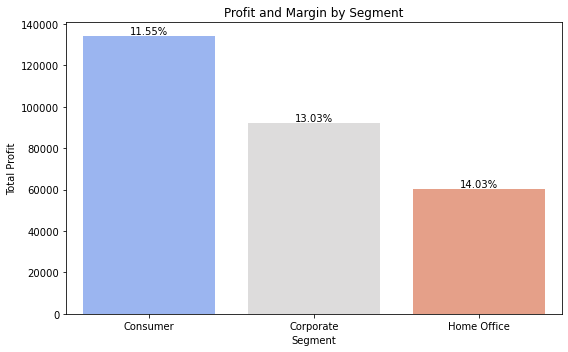

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=segment_profit, x='Segment', y='Profit', palette='coolwarm')
for i, row in segment_profit.iterrows():
    plt.text(i, row['Profit']+1000, f"{row['Profit Margin (%)']:.2f}%", ha='center')
plt.title('Profit and Margin by Segment')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

The **Home Office segment** is the most profitable customer segment, with a profit margin of **14.03%**, the highest among all segments.

While the **Consumer segment** generates the highest total sales **($1.16M)**, its **profit margin** is the lowest at **11.55%**, indicating higher costs or discounts in this group.

The **Corporate segment** shows a balanced performance with a **13.03%** margin, making it a stable contributor to overall profitability.

### Regional & Geographical Analysis

#### What are the sales and profit by region or state?

In [43]:
sales_region=superstore_data.groupby('Region')[['Profit','Sales']].sum().sort_values('Profit',ascending=False)
sales_region=sales_region.reset_index('Region')

In [44]:
sales_region

,Region,Profit,Sales
0,West,108418.4489,725457.8245
1,East,91522.7800,678781.2400
2,South,46749.4303,391721.9050
3,Central,39706.3625,501239.8908


In [40]:
sales_state=superstore_data.groupby('State')[['Profit','Sales']].sum().sort_values('Profit',ascending=False)
sales_state=sales_state.reset_index('State')

In [42]:
sales_state.head(10)

,State,Profit,Sales
0,California,76381.3871,457687.6315
1,New York,74038.5486,310876.2710
2,Washington,33402.6517,138641.2700
3,Michigan,24463.1876,76269.6140
4,Virginia,18597.9504,70636.7200
5,Indiana,18382.9363,53555.3600
6,Georgia,16250.0433,49095.8400
7,Kentucky,11199.6966,36591.7500
8,Minnesota,10823.1874,29863.1500
9,Delaware,9977.3748,27451.0690


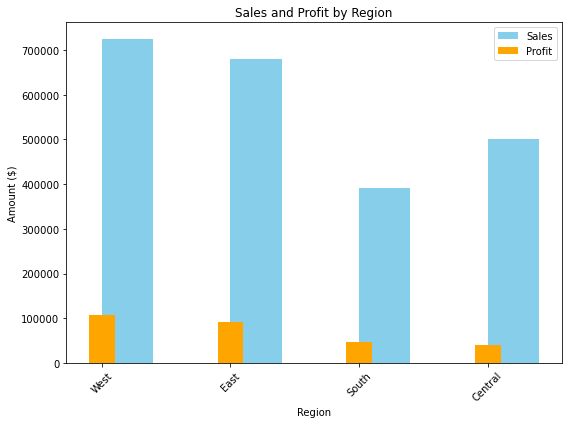

In [55]:
plt.figure(figsize=(8,6))
x = range(len(sales_region.index)) 
plt.bar(x, sales_region['Sales'], label='Sales',width=0.4,align='edge' ,color='skyblue')
plt.bar(x, sales_region['Profit'], label='Profit',width=0.2,align='center',color='orange')
plt.xticks(ticks=x, labels=sales_region['Region'], rotation=45)
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Region')
plt.legend()
plt.tight_layout()
plt.show()

### Which cities have the highest total sales?

In [56]:
city_sales = superstore_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(city_sales.head(10))  # Top 10 cities


City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


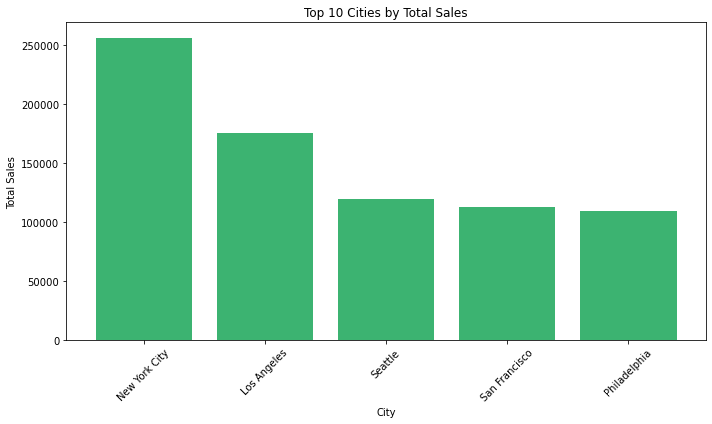

In [57]:
top_cities = city_sales.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values, color='mediumseagreen')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

An analysis of regional performance based on total sales and profit figures reveals the following insights:

The **West region** recorded the highest total sales, amounting to \\$725,457.82, and also achieved the highest profit of $108,418.45. This indicates strong market performance and profitability in the western region.

The **East region** followed with total sales of \\$678,781.24 and a corresponding profit of $91,522.78, positioning it as the second most lucrative region in terms of both revenue and profit.

The **Central region** generated \\$501,239.89 in sales, with a profit of $39,706.36. Although its sales figures are moderately high, the region reflects the lowest profit margin, indicating potential inefficiencies or higher costs.

The **South region** recorded the lowest total sales at \\$391,721.91, with a profit of $46,749.43. Despite its lower revenue, the profit is slightly higher than that of the Central region, suggesting relatively better cost control or pricing strategies.

 ### How Discount Affects Sales & Profit by Category

In [63]:
category_discount_analysis = superstore_data.groupby('Category').agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Discount', ascending=False)
category_discount_analysis=category_discount_analysis.reset_index()
print(category_discount_analysis)


          Category  Discount        Sales       Profit
0        Furniture  0.173923  741999.7953   18451.2728
1  Office Supplies  0.157285  719047.0320  122490.8008
2       Technology  0.132323  836154.0330  145454.9481


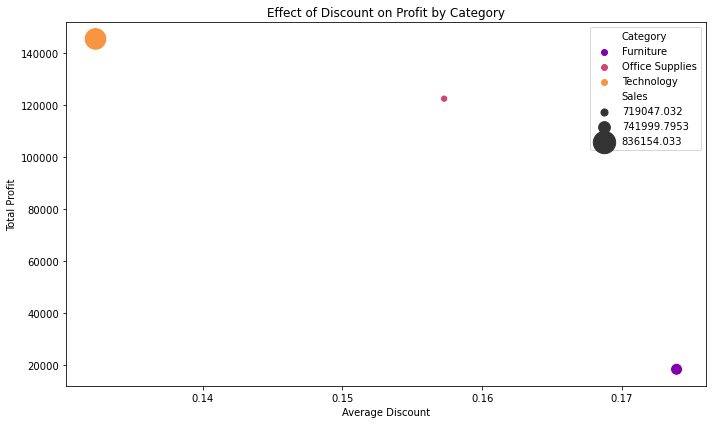

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=category_discount_analysis, x='Discount', y='Profit', hue='Category',size='Sales',  palette='plasma', sizes=(50, 500))
plt.title('Effect of Discount on Profit by Category')
plt.xlabel('Average Discount')
plt.ylabel('Total Profit')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Reduce the discount of **furniture** to make profit.Here **technology sales** has high sales and profit with less discount. so it has good pricing category

### How Discount Affects Sales & Profit in Region

In [12]:
region_discount_analysis = superstore_data.groupby('Region').agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Discount', ascending=False)

print(region_discount_analysis)


         Discount        Sales       Profit
Region                                     
Central  0.240353  501239.8908   39706.3625
South    0.147253  391721.9050   46749.4303
East     0.145365  678781.2400   91522.7800
West     0.109335  725457.8245  108418.4489


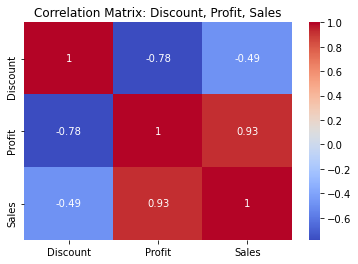

In [13]:
corr = region_discount_analysis[['Discount', 'Profit', 'Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Discount, Profit, Sales")
plt.show()

Here correlation between Discount and Profit is **negative**, it means **higher discounts** tend to **reduce profits**.

### How Discount Affects Sales & Profit in subcategory

In [71]:
subcat_discount_analysis = superstore_data.groupby('Sub-Category').agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Discount', ascending=False)

print(subcat_discount_analysis)


              Discount        Sales      Profit
Sub-Category                                   
Binders       0.372292  203412.7330  30221.7633
Machines      0.306087  189238.6310   3384.7569
Tables        0.261285  206965.5320 -17725.4811
Bookcases     0.211140  114879.9963  -3472.5560
Chairs        0.170178  328449.1030  26590.1663
Appliances    0.166524  107532.1610  18138.0054
Copiers       0.161765  149528.0300  55617.8249
Phones        0.154556  330007.0540  44515.7306
Furnishings   0.138349   91705.1640  13059.1436
Fasteners     0.082028    3024.2800    949.5182
Envelopes     0.080315   16476.4020   6964.1767
Accessories   0.078452  167380.3180  41936.6357
Supplies      0.076842   46673.5380  -1189.0995
Paper         0.074891   78479.2060  34053.5693
Art           0.074874   27118.7920   6527.7870
Storage       0.074704  223843.6080  21278.8264
Labels        0.068681   12486.3120   5546.2540


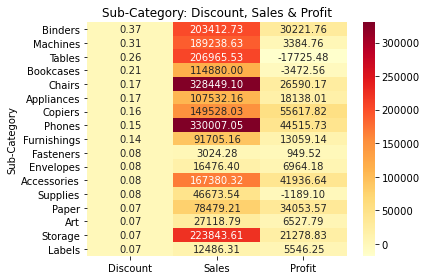

In [81]:
sns.heatmap(subcat_discount_analysis, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Sub-Category: Discount, Sales & Profit')
plt.tight_layout()
plt.show()


### Which sub-categories are most sold (by quantity)?

In [82]:
subcat_quantity = superstore_data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
print(subcat_quantity.head(10))  # Top 10 most sold sub-categories


Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Name: Quantity, dtype: int64


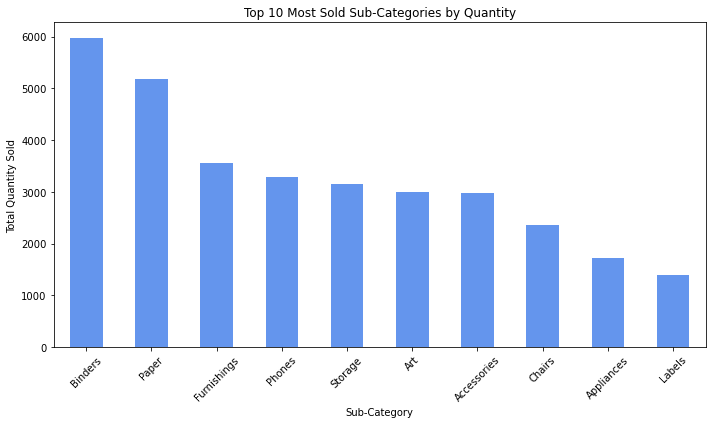

In [83]:
plt.figure(figsize=(10,6))
subcat_quantity.head(10).plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Most Sold Sub-Categories by Quantity')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### how quantity sold relates to sales or profit of sub categories

In [19]:
subcat_summary = superstore_data.groupby('Sub-Category').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount':'mean'
}).reset_index()


In [20]:
subcat_summary['ProfitPerUnit'] = subcat_summary['Profit'] / subcat_summary['Quantity']
subcat_summary['SalesPerUnit'] = subcat_summary['Sales'] / subcat_summary['Quantity']


In [21]:
subcat_summary.sort_values('ProfitPerUnit',ascending=False)

,Sub-Category,Quantity,Sales,Profit,Discount,ProfitPerUnit,SalesPerUnit
6,Copiers,234,149528.0300,55617.8249,0.161765,237.683012,639.008675
0,Accessories,2976,167380.3180,41936.6357,0.078452,14.091611,56.243386
13,Phones,3289,330007.0540,44515.7306,0.154556,13.534731,100.336593
5,Chairs,2356,328449.1030,26590.1663,0.170178,11.286149,139.409636
1,Appliances,1729,107532.1610,18138.0054,0.166524,10.490460,62.193268
11,Machines,440,189238.6310,3384.7569,0.306087,7.692629,430.087798
7,Envelopes,906,16476.4020,6964.1767,0.080315,7.686729,18.185874
14,Storage,3158,223843.6080,21278.8264,0.074704,6.738070,70.881446
12,Paper,5178,78479.2060,34053.5693,0.074891,6.576587,15.156278
3,Binders,5974,203412.7330,30221.7633,0.372292,5.058882,34.049671


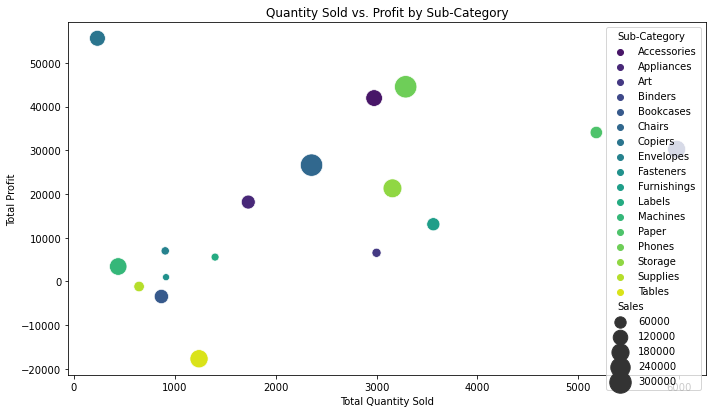

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=subcat_summary, x='Quantity', y='Profit', hue='Sub-Category', size='Sales', palette='viridis', sizes=(50, 500))
plt.title('Quantity Sold vs. Profit by Sub-Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

### Find inefficient sub-categories

In [22]:
# Sort by lowest profit per unit
print(subcat_summary.sort_values('ProfitPerUnit').head(1))


   Sub-Category  Quantity       Sales      Profit  Discount  ProfitPerUnit  \
16       Tables      1241  206965.532 -17725.4811  0.261285     -14.283224   

    SalesPerUnit  
16    166.773193  


**Tables** are inefficient subcategory which tries to sell more quantity but makes less profit. So avoid selling tables or increase price and decrease discount

### What are the most and least profitable categories?

In [90]:
category_profit = superstore_data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(category_profit)


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


Most profitable category is Technology and least is Furniture

### What is the discount trend across categories?

In [57]:
category_discount_trend = superstore_data.groupby('Category')['Discount'].mean().sort_values(ascending=False)
print(category_discount_trend)


Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64


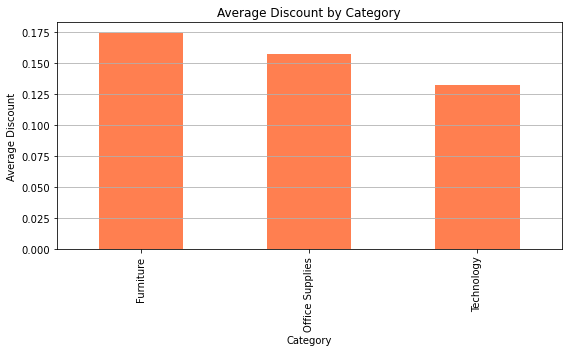

In [58]:
plt.figure(figsize=(8,5))
category_discount_trend.plot(kind='bar', color='coral')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Furniture** receives the highest average discount, possibly to compensate for low profit margins or to move slower inventory.

**Technology**, while being the most profitable, often has lower discount rates, indicating strong customer demand without the need for heavy promotions.

**Office Supplies** fall in between, with moderate discounting and solid profitability.

### ⏳ Time Series Analysis

### Monthly Sales and Profit Trend

In [26]:
superstore_data['Month_Num'] = superstore_data['OrderDate'].dt.month

In [31]:
monthly_trend = superstore_data.groupby(['Year', 'Month_Num', 'Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_trend = monthly_trend.sort_values(['Year', 'Month_Num'])

In [32]:
monthly_trend

,Year,Month_Num,Month,Sales,Profit
0,2014,1,January,14236.8950,2450.1907
1,2014,2,February,4519.8920,862.3084
2,2014,3,March,55691.0090,498.7299
3,2014,4,April,28295.3450,3488.8352
4,2014,5,May,23648.2870,2738.7096
5,2014,6,June,34595.1276,4976.5244
6,2014,7,July,33946.3930,-841.4826
7,2014,8,August,27909.4685,5318.1050
8,2014,9,September,81777.3508,8328.0994
9,2014,10,October,31453.3930,3448.2573


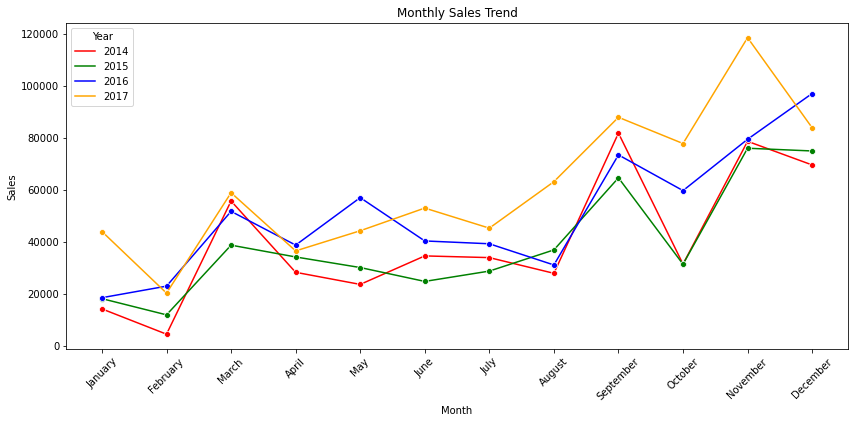

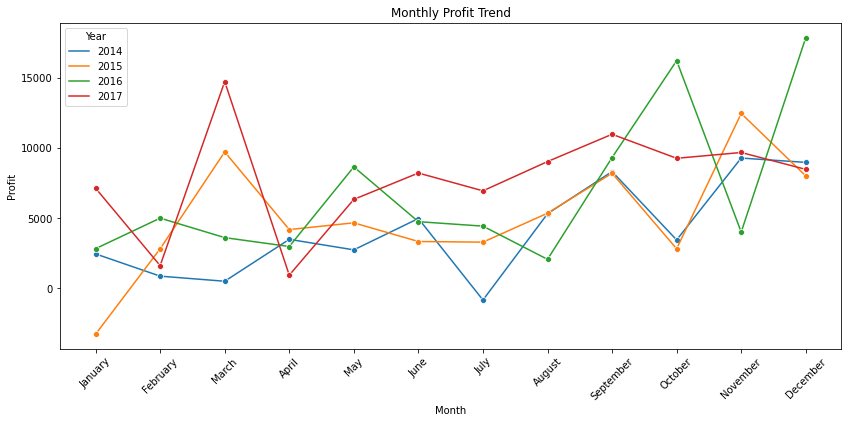

In [43]:
plt.figure(figsize=(14, 6))
palette = ['red', 'green', 'blue','orange']
sns.lineplot(data=monthly_trend, x='Month', y='Sales', hue='Year', marker='o',palette=palette)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
palette=['violet','green']
sns.lineplot(data=monthly_trend, x='Month', y='Profit', hue='Year', marker='o',palette='tab10')
plt.title('Monthly Profit Trend')
plt.xticks(rotation=45)
plt.show()

#### Strongest Months for Sales and Profit:



**September, November, and December** consistently show **high sales and profit** across all years — likely due to year-end promotions or holiday sales.**December 2016** had the highest monthly profit at **₹17.8K**.**November 2017** saw peak sales at **₹118K**.



### Low-Performing Months:

**January and February** usually show the lowest sales and profit, possibly due to post-holiday slowdowns.
For example, **January 2015** had a **loss (negative profit) of ₹3.2K**.

Even months with high sales (e.g., March 2014 or April 2017) don’t always guarantee high profits — indicating issues like high discounts or returns.

Focus marketing and inventory planning on **Q4 (Oct–Dec)** for maximizing revenue and profit.
Investigate **discounts or operational costs** in low-profit months like **April 2017 or January 2015**.
Use monthly trends to forecast and plan seasonal campaigns.

### Yearly Trend Analysis

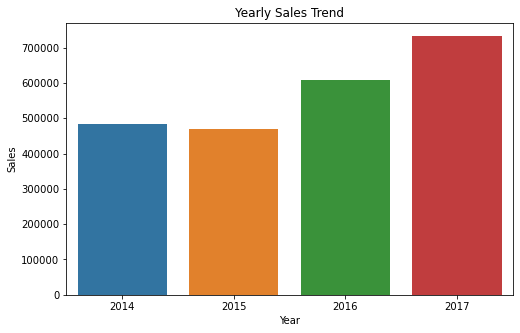

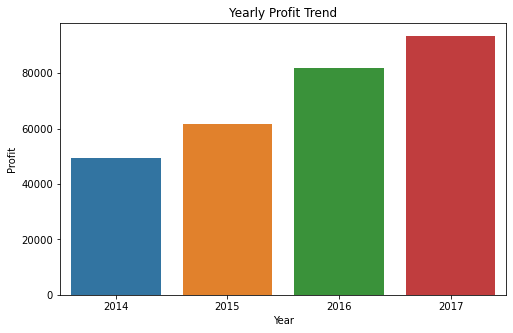

In [41]:
yearly_trend = superstore_data.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_trend, x='Year', y='Sales')
plt.title('Yearly Sales Trend')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_trend, x='Year', y='Profit')
plt.title('Yearly Profit Trend')
plt.show()


In [42]:
yearly_trend

,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


**Total sales** increased steadily from **₹484K** in 2014 to **₹733K** in 2017 — a **51%** rise over 4 years.**Profit** also showed an upward trend, rising from **₹49K** in 2014 to **₹93K** in 2017, almost doubling in that period.



## Details of sales in differnet year for different Category

In [28]:
details_year=superstore_data.groupby(['Year','Category'])[['Sales','Quantity','Profit']].sum().reset_index()

In [29]:
details_year

,Year,Category,Sales,Quantity,Profit
0,2014,Furniture,157192.8531,1623,5457.7255
1,2014,Office Supplies,151776.4120,4569,22593.4161
2,2014,Technology,175278.2330,1389,21492.8325
3,2015,Furniture,170518.2370,1775,3015.2029
4,2015,Office Supplies,137233.4630,4715,25099.5338
5,2015,Technology,162780.8090,1489,33503.8670
6,2016,Furniture,198901.4360,2193,6959.9531
7,2016,Office Supplies,183939.9820,5946,35061.2292
8,2016,Technology,226364.1800,1698,39773.9920
9,2017,Furniture,215387.2692,2437,3018.3913


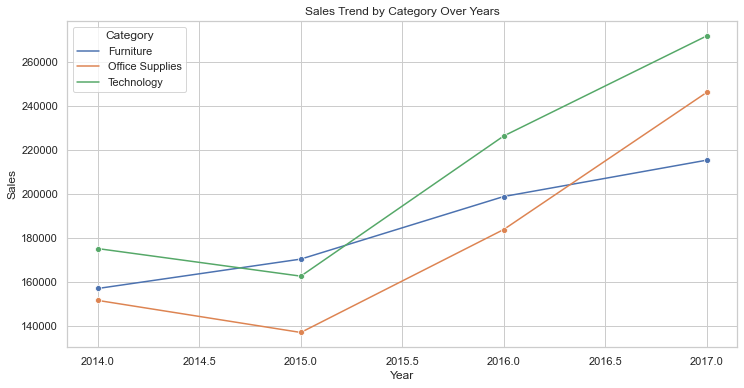

In [36]:
sns.set(style="whitegrid")

# Plot Sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=details_year, x='Year', y='Sales', hue='Category', marker='o')
plt.title("Sales Trend by Category Over Years")
plt.ylabel("Sales")
plt.show()

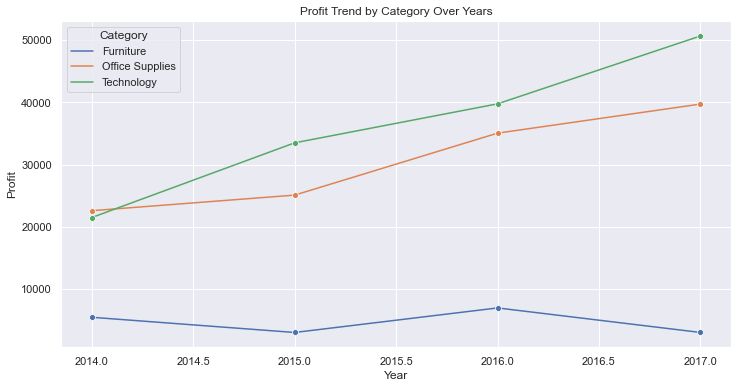

In [37]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=details_year, x='Year', y='Profit', hue='Category', marker='o')
plt.title("Profit Trend by Category Over Years")
plt.ylabel("Profit")
plt.show()

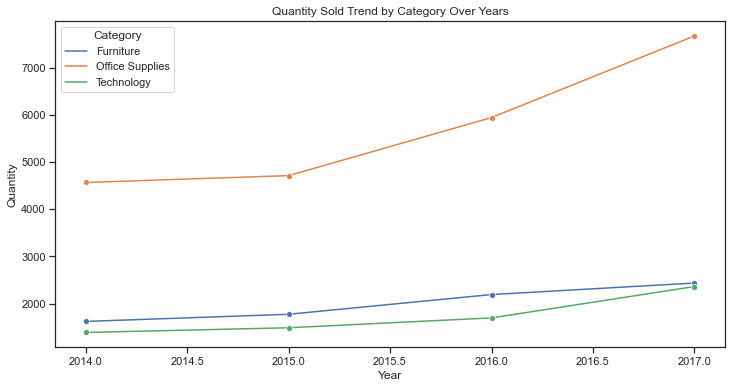

In [38]:
sns.set(style='ticks')
plt.figure(figsize=(12,6))
sns.lineplot(data=details_year, x='Year', y='Quantity', hue='Category', marker='o')
plt.title("Quantity Sold Trend by Category Over Years")
plt.ylabel("Quantity")
plt.show()

For **Furniture**, **Sales** increased steadily from **₹157,192 in 2014 to ₹215,387 in 2017**.However, **Profit remained low** and inconsistent, peaking only slightly in **2016 (₹6,959)** and falling again in **2017 (₹3,018)**.This indicates that while furniture sales grew, the **profit margin** remained weak, likely due to **high discounts or cost structure**.

For **Office Supplies**, Sales rose from **₹151,776 in 2014 to ₹246,097 in 2017**, with a consistent upward trend.**Profit** also grew significantly from **₹22,593 to ₹39,736** over the same period. Office Supplies maintained a healthy balance of quantity and profit, showing efficient pricing and operational strategy.

**Technology** consistently performed the best among the three categories.Sales grew from **₹175,278 in 2014 to ₹271,730 in 2017**.Profit showed a sharp rise from **₹21,492 in 2014 to ₹50,684 in 2017**.This category had the **highest profitability and growth**, indicating strong customer demand and good margins.

### How does sales vary before and after shipping?

Sales is typically recorded at the time of order, not after shipping. So technically, sales doesn't change after shipping.Sales represent the monetary value of an order when it is placed. However, shipping date can help us analyze shipping delays or shipping time trends, which might affect customer satisfaction or operational efficiency, not the sales value itself.

#### Analyze impact of delay on sales

In [46]:
superstore_data['ShippingDelay'] = (superstore_data['ShipDate'] - superstore_data['OrderDate']).dt.days



In [47]:
shipping_impact = superstore_data.groupby('ShippingDelay')[['Sales', 'Profit']].sum().reset_index()
print(shipping_impact.sort_values('ShippingDelay'))


   ShippingDelay        Sales      Profit
0              0  124907.6910  15385.9685
1              1   67975.3312   7541.2269
2              2  368465.8300  53118.1143
3              3  204659.5988  26875.9187
4              4  631847.0053  71134.7742
5              5  494357.0837  58733.2045
6              6  240290.5698  33275.9677
7              7  164697.7505  20331.8469


### Average delay per year

In [51]:

avg_delay_year = superstore_data.groupby('Year')['ShippingDelay'].mean()
print("  \t\t Average Shipping Delay by Year:\n", avg_delay_year)

  		 Average Shipping Delay by Year:
 Year
2014    3.996989
2015    4.013796
2016    3.950522
2017    3.905495
Name: ShippingDelay, dtype: float64


### Average delay per Ship Mode


In [53]:
avg_delay_shipmode = superstore_data.groupby('ShipMode')['ShippingDelay'].mean()
print("\t\t\t Average Shipping Delay by Ship Mode:\n", avg_delay_shipmode)

			 Average Shipping Delay by Ship Mode:
 ShipMode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: ShippingDelay, dtype: float64


### Relation between delay and profit

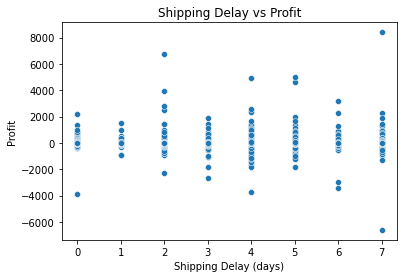

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='ShippingDelay', y='Profit', data=superstore_data)
plt.title('Shipping Delay vs Profit')
plt.xlabel('Shipping Delay (days)')
plt.ylabel('Profit')
plt.show()

In [55]:
delay_profit=superstore_data.groupby('ShippingDelay')[['Profit','Sales']].sum()

In [56]:
delay_profit

,Profit,Sales
ShippingDelay,,
0,15385.9685,124907.6910
1,7541.2269,67975.3312
2,53118.1143,368465.8300
3,26875.9187,204659.5988
4,71134.7742,631847.0053
5,58733.2045,494357.0837
6,33275.9677,240290.5698
7,20331.8469,164697.7505


**Very short delays (0–1 days)** consistently show **lower total profit and sales**, possibly due to smaller order sizes or limited item categories.Orders shipped on the same day (0-day delay) showed moderate sales and profit, possibly due to low-complexity items or fast-track shipments.

Delays **beyond 5 days** show a gradual decline in both sales and profit, which may indicate:
- Decreased customer satisfaction or fewer high-value orders in these ranges.
- Operational constraints or limitations in delivery logistics for complex orders.

The **highest sales and profit** were observed when the shipping delay was **4–5 days**, suggesting that most orders fall into this range or that these delays are typical for high-value products.

### 🚚 Shipping & Delivery


#### Which ship mode has the highest sales?

In [59]:
shipmode_sales = superstore_data.groupby('ShipMode')['Sales'].sum().sort_values(ascending=False)
print(shipmode_sales)


ShipMode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64


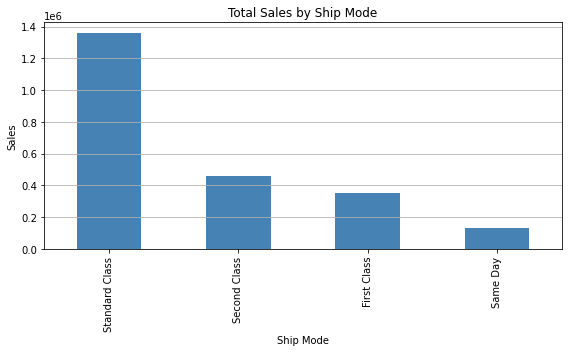

In [60]:
plt.figure(figsize=(8,5))
shipmode_sales.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Standard Class** generates the highest sales, likely due to its affordability and wide usage.

**Same Day shipping**, while convenient, contributes the least to total sales, possibly due to higher cost or limited product eligibility.



### Does faster shipping lead to higher profit?

In [61]:
delay_profit = superstore_data.groupby('ShippingDelay')['Profit'].mean().reset_index()


In [63]:
delay_profit

,ShippingDelay,Profit
0,0,29.645411
1,1,20.436929
2,2,39.818676
3,3,26.742208
4,4,25.643394
5,5,27.078471
6,6,27.660821
7,7,32.740494


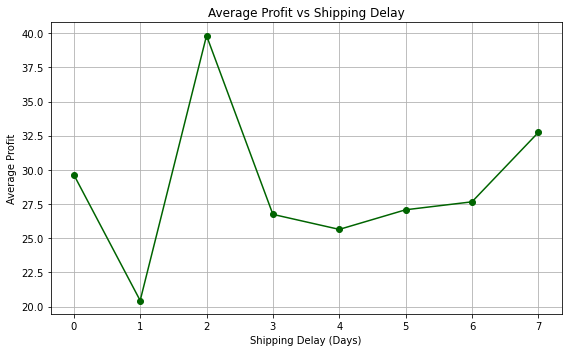

In [64]:
plt.figure(figsize=(8,5))
plt.plot(delay_profit['ShippingDelay'].to_numpy(), delay_profit['Profit'].to_numpy(), 
         marker='o', linestyle='-', color='darkgreen')

plt.title('Average Profit vs Shipping Delay')
plt.xlabel('Shipping Delay (Days)')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

The **highest average profit** is associated with a **2-day shipping delay (₹39.82)**, followed by **7-day delay (₹32.74)**.

But same-day shipping (0 delay) does not result in the highest profit.

1-day delay yields the lowest average profit, possibly due to fast, low-margin items or lower-value orders.

There is no consistent trend showing that faster shipping always leads to higher profit.